# Fall 2022 Data Science Intern Challenge (Reid Zaffino)

First, start by importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

Then, read in the data from the table as a datframe for easy use. Additionally, check the number of rows and validate the data looks as expected.

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
rows = df.shape[0]
print("Total number of rows: " + str(rows))
pd.set_option('display.max_rows', rows)
df.head()

Total number of rows: 5000


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Before proceeding further, check to see if the table contains and NaN values, which would need to be dealt with if they existed.

In [3]:
print(df.isna().sum().sum())

0


Now let's validate the AOV of $3145.13, and take a look at other simple measures such as the median and stard deviation.

In [4]:
order_mean = df["order_amount"].mean()
order_median = df["order_amount"].median()
order_std = df["order_amount"].std()

print("The mean order amount is: " + str(order_mean))
print("The median order amount is: " + str(order_median))
print("The standard deviation of order amount is: " + str(order_std))

The mean order amount is: 3145.128
The median order amount is: 284.0
The standard deviation of order amount is: 41282.539348788036


The AOV is very large as mentioned in the question, though looking at the median, we can see that the problem with the mean is most likely outliers. The massive standard deviation is also indicative of this, and since medians are more robust to outlier data, the median order value (MOV) would be a better metric than AOV. This MOV is $284.00, much closer to what we might expect for sneaker sales.

Even though we have a proposed better metric, we should still look at the data to understand why an alternative metric was needed in the first place. Using a scatterplot, we can better visualize the data.

Text(0, 0.5, 'Order Amount ($)')

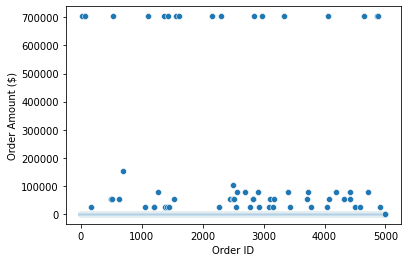

In [5]:
sns.scatterplot(x = df["order_id"], y = df["order_amount"])
plt.xlabel("Order ID")
plt.ylabel("Order Amount ($)")

The scatter plot validates the idea that we have drastic outliers in our data. It appears that a majority of the data points a nearly zero (The horizontal line at the bottom of the graph) when compared to the max values of nearly $700000. Obviously the high values should be dealt with in some way, but the middle values of the chart are also extreme outliers.

Now that we have seen the outliers clearly, lets view them in the table format to see what is causing the problem.

In [6]:
df.sort_values(by="order_amount", ascending=False).head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


From looking at this table, we can see a few different groups of outliers. The first group is the orders from the shop with shop_id 42, as this shop sells in extremely large quantities of 2000 items per order. This is likely a unique shop compared with the typical Shopify sneaker store, perhaps a bulk store which sells to a local vendor. Next are the extremely expensive orders associated with shop_ids 78 and 42. It is possible these orders are made up of packages that are not counted as separate items (such as 1000 sneakers being counted as one item), or potentially extremely high-end sneakers which are uncommonly expensive (wildy so!). Another possibility is that the data was not inputted properly, if the currency was in something other than the rest of the data (such as Japanes Yen since the conversion from USD, or CAD to Yen is extremely large). Regardless, these clusters of outliers are fairly different from the average shopify store, and only make up a small number of the total orders being considered. One option for dealing with this is to remove the outliers, to ensure they do not reduce the validity of typical statisitcal measures.

In [7]:
df = df.drop(df[df["order_amount"] > 1400].index)
rows = df.shape[0]
print("Number of rows of cleaned data: " + str(rows))

Number of rows of cleaned data: 4934


As we can see from the new number of rows, the outliers only made up a very small portion of the total number of orders, so it is not unreasonable to remove them from the data while still having a valid sample. Now we can look at the new highest order amount orders to see if the data is more continuous and less riddled with outliers.

In [8]:
df.sort_values(by="order_amount", ascending=False).head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18
3513,3514,42,726,1056,3,debit,2017-03-24 17:51:05
2987,2988,42,819,1056,3,cash,2017-03-03 9:09:25
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
3077,3078,89,754,980,5,debit,2017-03-13 5:27:58
2494,2495,50,757,965,5,debit,2017-03-04 7:32:45
4847,4848,13,993,960,6,cash,2017-03-27 11:00:45
1563,1564,91,934,960,6,debit,2017-03-23 8:25:49
2307,2308,61,723,948,6,credit_card,2017-03-26 11:29:37


Now that we have seen the table to be more reasonable, we can visualize the order amount data with a histogram to see the distribution better.

Text(0.5, 6.79999999999999, 'Order Amount ($)')

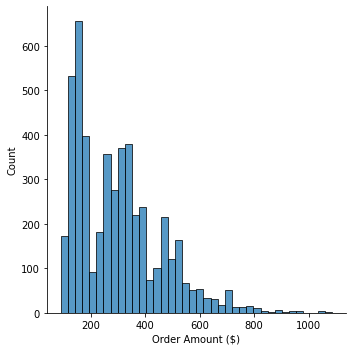

In [9]:
sns.displot(data = df["order_amount"])
plt.xlabel("Order Amount ($)")

This histogram is a definite improvement of visualization as compared to the scatterplot with outliers, though there is a really large number of bins which is difficult to read. By specifying the number of bins using sturges law, we may get a better visualization.

Text(0.5, 6.79999999999999, 'Order Amount ($)')

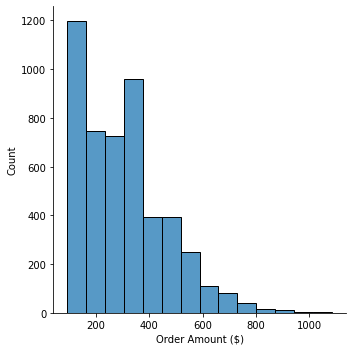

In [10]:
sns.displot(data = df["order_amount"], bins = int(math.ceil(math.log2(rows))) + 1)
plt.xlabel("Order Amount ($)")

From seeing this new histogram, we can see new trends in the data. One obvious pattern is that the distribtiution of the order amount seems to be bimodal: most orders are either roughly 150 dollars or around 300 dollars. One explanation for this might be that people typically purchase either one pair of sneakers or two with the price being around 150 dollars for each pair. We can test this idea by analyzingthe data further.

In [11]:
print("Number of orders of one pair of sneakers: " + str(df[df["total_items"] == 1].shape[0]))
print("Number of orders of two pairs of sneakers: " + str(df[df["total_items"] == 2].shape[0]))
print("Number of orders of three pairs of sneakers: " + str(df[df["total_items"] == 3].shape[0]))
print("Number of orders of four pairs of sneakers: " + str(df[df["total_items"] == 4].shape[0]))

Number of orders of one pair of sneakers: 1811
Number of orders of two pairs of sneakers: 1816
Number of orders of three pairs of sneakers: 932
Number of orders of four pairs of sneakers: 290


151.66680178354275


Text(0.5, 6.79999999999999, 'Amount/Item ($/Item)')

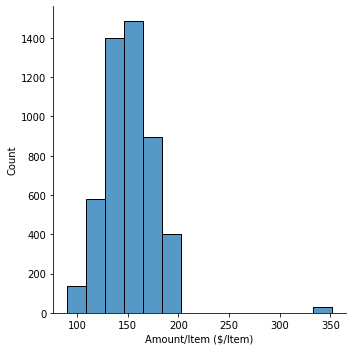

In [12]:
df["amount_per_item"] = df["order_amount"]/df["total_items"]
print(df["amount_per_item"].mean())
sns.displot(data = df["amount_per_item"], bins = int(math.ceil(math.log2(rows))) + 1)
plt.xlabel("Amount/Item ($/Item)")

From this, we can see why the distribution is bimodal, and why the specific order amounts spike at various price points. Lastly, we should take a look at the new measures of central tendency on the outlier free data, to compare with the original values.

In [13]:
order_mean = df["order_amount"].mean()
order_median = df["order_amount"].median()
order_std = df["order_amount"].std()

print("The mean order amount is: " + str(order_mean))
print("The median order amount is: " + str(order_median))
print("The standard deviation of order amount is: " + str(order_std))

The mean order amount is: 301.83704904742604
The median order amount is: 284.0
The standard deviation of order amount is: 157.94742418763096


Now we see much more reasonable AOV of 301 dollars, as well as a lower standard deviation. The median has not changed at all, which truly demonstrates the robustness of medians compared to means when considering non-normally distributed (or outlier ridden) data.